In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [85]:
import datetime as dt

### Protests

In [86]:
df_risk = pd.read_excel('TermometroRsocial.xlsx', sheet_name = 'bd')
df_risk.head()

,MesAñoCode,Pais,date,/g/120ry1nd,log,cycle,trend,Protest,Protest size,Duration
0,12010AR,AR,2010-01-01,0.925926,-0.076961,0.934765,-1.011726,0,NaN,NaN
1,22010AR,AR,2010-02-01,0.000000,-4.605170,-3.993229,-0.611941,0,NaN,NaN
2,32010AR,AR,2010-03-01,2.592593,0.952658,1.149234,-0.196576,0,NaN,NaN
3,42010AR,AR,2010-04-01,4.074074,1.404643,1.221249,0.183394,0,NaN,NaN
4,52010AR,AR,2010-05-01,3.518519,1.258040,0.761891,0.496149,0,NaN,NaN


In [87]:
df_risk.at[0,'date']

Timestamp('2010-01-01 00:00:00')

In [88]:
df_risk['month'] = df_risk['date'].dt.to_period('M')

In [89]:
df_risk['IX'] = df_risk['month'].astype(str) + df_risk['Pais']

### Macro

In [90]:
df_macro = pd.read_excel('macro_data.xlsx')
df_macro.head()

,date,Country,trm,i,inflation,unemployment
0,2000-01-01,Argentina,0.999781,NaN,NaN,NaN
1,2000-02-01,Argentina,0.999719,NaN,NaN,NaN
2,2000-03-01,Argentina,0.999739,NaN,NaN,NaN
3,2000-04-01,Argentina,0.999694,NaN,NaN,NaN
4,2000-05-01,Argentina,0.999733,NaN,NaN,NaN


In [91]:
df_macro['Country'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Dominican Republic',
       'EL Salvador', 'Mexico', 'Uruguay', 'Panama', 'Germany', 'France',
       'Netherlands'], dtype=object)

In [92]:
iso_codes = {'Argentina':'AR', 'Brazil':'BR', 'Chile':'CL', 'Colombia':'CO', 'Dominican Republic':'DO',
       'EL Salvador':'SV', 'Mexico':'MX', 'Uruguay':'UY', 'Panama':'PA', 'Germany':'DE', 'France':'FR',
       'Netherlands':'NL', 'Peru':'PE'}

country_codes = []
for country in df_macro['Country']:
    cc = iso_codes[country]
    country_codes.append(cc)
    
df_macro['CC'] = country_codes

In [93]:
df_macro.at[0,'date']

Timestamp('2000-01-01 00:00:00')

In [94]:
df_macro['month'] = df_macro['date'].dt.to_period('M')

In [95]:
df_macro['IX'] = df_macro['month'].astype(str) + df_macro['CC']
df_macro

,date,Country,trm,i,inflation,unemployment,CC,month,IX
0,2000-01-01,Argentina,0.999781,NaN,NaN,NaN,AR,2000-01,2000-01AR
1,2000-02-01,Argentina,0.999719,NaN,NaN,NaN,AR,2000-02,2000-02AR
2,2000-03-01,Argentina,0.999739,NaN,NaN,NaN,AR,2000-03,2000-03AR
3,2000-04-01,Argentina,0.999694,NaN,NaN,NaN,AR,2000-04,2000-04AR
4,2000-05-01,Argentina,0.999733,NaN,NaN,NaN,AR,2000-05,2000-05AR
...,...,...,...,...,...,...,...,...,...
3280,2021-05-01,Netherlands,0.823052,-0.005,0.021273,NaN,NL,2021-05,2021-05NL
3281,2021-06-01,Netherlands,0.830545,-0.005,0.020091,NaN,NL,2021-06,2021-06NL
3282,2021-07-01,Netherlands,0.845550,-0.005,0.014169,NaN,NL,2021-07,2021-07NL
3283,2021-08-01,Netherlands,0.849686,-0.005,0.023860,NaN,NL,2021-08,2021-08NL


### Inflación alimentos

In [110]:
df_cpi = pd.read_excel('cpi_food.xlsx', sheet_name = 'data')
df_cpi 

,date,AR,BR,CL,CO,DO,SV,MX,UY
0,2012-01-01,NaN,0.066300,NaN,0.045136,0.088083,0.029863,0.072493,0.067862
1,2012-02-01,NaN,0.060373,NaN,0.042919,0.076241,0.026721,0.066384,0.067538
2,2012-03-01,NaN,0.056894,NaN,0.039913,0.060468,0.015966,0.060795,0.069368
3,2012-04-01,NaN,0.055634,NaN,0.046195,0.051567,0.002050,0.044311,0.085334
4,2012-05-01,NaN,0.066112,NaN,0.042489,0.043454,-0.004617,0.060691,0.079375
...,...,...,...,...,...,...,...,...,...
129,2022-10-01,0.921,0.112440,0.220029,0.270220,0.098901,0.128161,0.140530,0.112009
130,2022-11-01,0.945,0.109021,0.239522,0.270819,0.097954,0.120631,0.122576,0.112766
131,2022-12-01,0.975,0.104085,0.247157,0.278099,0.111926,0.122435,0.125185,0.117736
132,2023-01-01,1.003,0.096563,0.239413,0.261770,0.113561,0.122125,0.126376,0.123854


In [116]:
df_cpi_melted = df_cpi.melt(id_vars = 'date', var_name ='Country', value_name = 'food_inflation')
df_cpi_melted['month'] = df_cpi_melted['date'].dt.to_period('M')
df_cpi_melted['IX'] = df_cpi_melted['month'].astype(str) + df_cpi_melted['Country']
df_cpi_melted

,date,Country,food_inflation,month,IX
0,2012-01-01,AR,NaN,2012-01,2012-01AR
1,2012-02-01,AR,NaN,2012-02,2012-02AR
2,2012-03-01,AR,NaN,2012-03,2012-03AR
3,2012-04-01,AR,NaN,2012-04,2012-04AR
4,2012-05-01,AR,NaN,2012-05,2012-05AR
...,...,...,...,...,...
1067,2022-10-01,UY,0.112009,2022-10,2022-10UY
1068,2022-11-01,UY,0.112766,2022-11,2022-11UY
1069,2022-12-01,UY,0.117736,2022-12,2022-12UY
1070,2023-01-01,UY,0.123854,2023-01,2023-01UY


### Merge

In [96]:
df_merge = df_risk.merge(df_macro, how='left', on='IX')
print('Largo del df_risk',len(df_risk))
print('Largo del merge',len(df_merge))

Largo del df_risk 1580
Largo del merge 1580


In [118]:
df_merge2 = df_merge.merge(df_cpi_melted, how = 'left', on = 'IX')
print('Largo del df_merge',len(df_merge))
print('Largo del merge2',len(df_merge2))

Largo del df_merge 1580
Largo del merge2 1580


In [119]:
df_merge2.head()

,MesAñoCode,Pais,date_x,/g/120ry1nd,log,cycle,trend,Protest,Protest size,Duration,...,trm,i,inflation,unemployment,CC,month_y,date,Country_y,food_inflation,month
0,12010AR,AR,2010-01-01,0.925926,-0.076961,0.934765,-1.011726,0,NaN,NaN,...,3.802490,NaN,0.083238,NaN,AR,2010-01,NaT,NaN,NaN,NaT
1,22010AR,AR,2010-02-01,0.000000,-4.605170,-3.993229,-0.611941,0,NaN,NaN,...,3.847660,NaN,0.090703,NaN,AR,2010-02,NaT,NaN,NaN,NaT
2,32010AR,AR,2010-03-01,2.592593,0.952658,1.149234,-0.196576,0,NaN,NaN,...,3.861022,NaN,0.097175,NaN,AR,2010-03,NaT,NaN,NaN,NaT
3,42010AR,AR,2010-04-01,4.074074,1.404643,1.221249,0.183394,0,NaN,NaN,...,3.873909,NaN,0.102477,NaN,AR,2010-04,NaT,NaN,NaN,NaT
4,52010AR,AR,2010-05-01,3.518519,1.258040,0.761891,0.496149,0,NaN,NaN,...,3.898348,NaN,0.106383,NaN,AR,2010-05,NaT,NaN,NaN,NaT


In [120]:
df_merge2.columns

Index(['MesAñoCode', 'Pais', 'date_x', '/g/120ry1nd', 'log', 'cycle', 'trend',
       'Protest', 'Protest size', 'Duration', 'month_x', 'IX', 'date_y',
       'Country_x', 'trm', 'i', 'inflation', 'unemployment', 'CC', 'month_y',
       'date', 'Country_y', 'food_inflation', 'month'],
      dtype='object')

In [132]:
#data = df_merge2[['date_x','/g/120ry1nd', 'log', 'cycle', 'trend',
#       'Protest','CC', 'trm', 'i', 'inflation', 'food_inflation', 'unemployment', 'IX']].copy()

data = df_merge2[['date_x','/g/120ry1nd', 'log', 'cycle', 'trend',
       'Protest','CC', 'trm', 'i', 'inflation',  'unemployment', 'IX']].copy()


data.rename(columns ={'date_x':'date'}, inplace = True)
data

,date,/g/120ry1nd,log,cycle,trend,Protest,CC,trm,i,inflation,unemployment,IX
0,2010-01-01,0.925926,-0.076961,0.934765,-1.011726,0,AR,3.802490,NaN,0.083238,NaN,2010-01AR
1,2010-02-01,0.000000,-4.605170,-3.993229,-0.611941,0,AR,3.847660,NaN,0.090703,NaN,2010-02AR
2,2010-03-01,2.592593,0.952658,1.149234,-0.196576,0,AR,3.861022,NaN,0.097175,NaN,2010-03AR
3,2010-04-01,4.074074,1.404643,1.221249,0.183394,0,AR,3.873909,NaN,0.102477,NaN,2010-04AR
4,2010-05-01,3.518519,1.258040,0.761891,0.496149,0,AR,3.898348,NaN,0.106383,NaN,2010-05AR
...,...,...,...,...,...,...,...,...,...,...,...,...
1575,2022-10-01,12.277778,2.507791,-0.433978,2.941769,0,NaN,NaN,NaN,NaN,NaN,2022-10PE
1576,2022-11-01,17.333333,2.852631,-0.158999,3.011630,1,NaN,NaN,NaN,NaN,NaN,2022-11PE
1577,2022-12-01,22.388889,3.108565,0.010989,3.097575,0,NaN,NaN,NaN,NaN,NaN,2022-12PE
1578,2023-01-01,46.222222,3.833461,0.642911,3.190549,0,NaN,NaN,NaN,NaN,NaN,2023-01PE


In [133]:
data.dropna(subset = ['CC'], inplace = True)

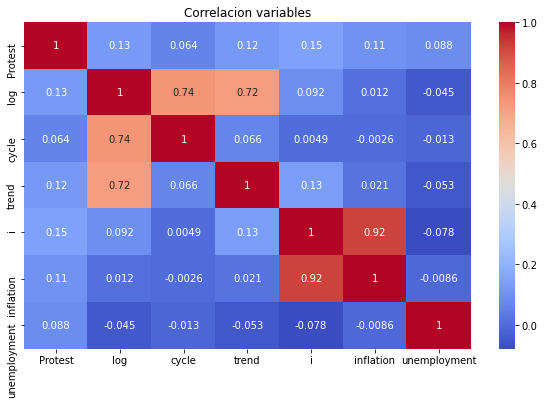

In [135]:
data['log_fx'] = np.log(data['trm'])
df_correl = data[['Protest','log', 'cycle', 'trend', 'i', 'inflation', 'unemployment']].corr()
#df_correl = data[['Protest','log', 'cycle', 'trend', 'i', 'inflation', 'food_inflation', 'unemployment']].corr()
plt.figure(figsize = (10,6))
sns.heatmap(df_correl, annot = True, cmap ='coolwarm')
plt.title('Correlacion variables')
plt.show()

# Model

In [136]:
data_model = data.dropna()

In [137]:
dummies = pd.get_dummies(data_model['CC'])
data_model = pd.concat([data_model, dummies], axis=1)
data_model.columns

Index(['date', '/g/120ry1nd', 'log', 'cycle', 'trend', 'Protest', 'CC', 'trm',
       'i', 'inflation', 'unemployment', 'IX', 'log_fx', 'BR', 'CL', 'CO',
       'MX'],
      dtype='object')

In [138]:
# Load data
X = data_model[[ 'trend', 'i','unemployment','CL', 'CO','MX']]
#X = data_model[[ 'trend', 'i', 'food_inflation','unemployment','CL', 'CO','MX']]
X = sm.add_constant(X) # add constant to fit intercept
y = data_model[['Protest']]

# Fit logistic regression model
logit_model = sm.Logit(y, X, missing='drop')
result = logit_model.fit()

# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.084538
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Protest   No. Observations:                  598
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            6
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.2386
Time:                        14:58:57   Log-Likelihood:                -50.554
converged:                       True   LL-Null:                       -66.398
Covariance Type:            nonrobust   LLR p-value:                 1.872e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.0099      3.436     -4.659      0.000     -22.745      -9.275
trend            4.287

Sklearn

In [139]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X is the feature matrix and y is the target variable
# test_size=0.2 means that 20% of the data will be used for testing
# random_state=42 is a random seed for reproducibility


In [140]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#accuracy
clf.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9666666666666667

F1 score

In [141]:
from sklearn.metrics import f1_score
y_true = y_test
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # predicted probabilities for the positive class
threshold = 0.5  # threshold for converting probabilities to binary predictions
y_pred = (y_pred_proba > threshold).astype(int)  # convert probabilities to binary predictions

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
f1

0.0